In [1]:
# Ruifeng Hu
## 08-30-2019
## SBMI

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="bright")
%matplotlib inline

from scipy.stats import wilcoxon

print("Start...")
gene_list = {'HNRNPD':"ENSG00000138668.18_3",'HNRNPUL1':"ENSG00000105323.16_2",'CHERP':"ENSG00000085872.14_3",
             'HNRNPM':"ENSG00000099783.11_3",'SRSF3':"ENSG00000112081.16_2",'PRPF38A':"ENSG00000134748.12_2",
             'RBMX':"ENSG00000147274.14_2",'SF3A2':"ENSG00000104897.9_4",'SNRPA':"ENSG00000077312.8_3",
             'HNRNPA0':"ENSG00000177733.6_3",'HNRNPF':"ENSG00000169813.16_3"}

cancer_type = "TARGET"

RNAseq = pd.read_csv(cancer_type+"\\rnaseq_TPM.csv", header=0, index_col=0, sep=",")
RNAseq=RNAseq.apply(lambda x: np.log2(x+1))
print(RNAseq.shape)

samples_normal = RNAseq.loc[:,RNAseq.columns.str.endswith("-11")]
samples_tumor = RNAseq

print("Done!")

Start...
(59955, 101)
Done!


In [5]:
###### RB1 cut-off
gene_x={"RB1":"ENSG00000139687.13_2","E2F3":"ENSG00000112242.14_3"}
cutoff_gene = "RB1"

samples_x = samples_tumor.loc[[gene_x[cutoff_gene]], :]
samples_x.sort_values(by = gene_x[cutoff_gene], inplace = True, axis = 1)

samples_size = samples_x.shape[1]

percent = 0.5
low_size = int(samples_size * percent)
low_samples = samples_x.columns[0 : low_size]
high_samples =  samples_x.columns[(samples_size - low_size) : samples_size]

print(len(low_samples),len(high_samples))

50 50


In [6]:
d = {'gene': [], 'case_type': [], 'p': [], 'expr':[]}
df = pd.DataFrame(data=d)
fout = open(cancer_type+"_"+cutoff_gene+"_50_table.txt","w")
for gene_i in gene_list:
    print(gene_i)
    gene_11_i =  gene_list[gene_i]
    samples_gene_low =samples_tumor.loc[gene_11_i,low_samples].values
    samples_gene_high = samples_tumor.loc[gene_11_i,high_samples].values

    total_n = len(samples_gene_low) + len(samples_gene_high)
    
    case_type = [cutoff_gene+'_low'] * len(samples_gene_low) + [cutoff_gene+'_high'] * len(samples_gene_high)  
    z_statistic, p_value  = wilcoxon( samples_gene_low, samples_gene_high)
    p = [p_value] * total_n
    if p_value < 0.01:
        gene = [gene_i+"**"] * total_n
    elif p_value < 0.05:
        gene = [gene_i+"*"] * total_n
    else:
        gene = [gene_i] * total_n
        
    expression = list(np.append(samples_gene_low,samples_gene_high))
    d = {'gene': gene, 'case_type': case_type, 'p': p, 'expr':expression}
    sub_df = pd.DataFrame(data = d)
    df = df.append(sub_df, ignore_index=True)
    fout.write(gene_i + "\t" + str(p_value) + "\n")
fout.close()
    

HNRNPD
HNRNPUL1
CHERP
HNRNPM
SRSF3
PRPF38A
RBMX
SF3A2
SNRPA
HNRNPA0
HNRNPF


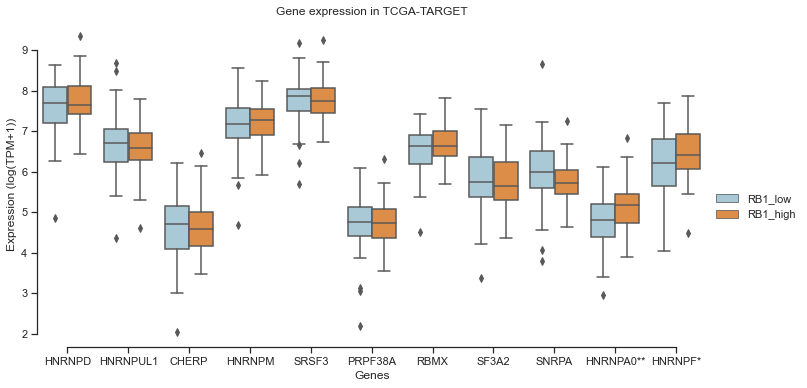

In [7]:
# Draw a nested boxplot to show bills by day and time
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="gene", y="expr",
            hue="case_type",palette= ["#A3CCDE", "#F58C30"],
            data=df,)
sns.despine(trim=True)

ax.set(ylabel="Expression (log(TPM+1))")
ax.set(xlabel="Genes")
ax.set(title = 'Gene expression in TCGA-' + cancer_type)
ax.legend(title="",bbox_to_anchor=(1, 0.5), frameon=False)

# for i in range(0,2*len(gene_list),2):    
#     # Select which box you want to change    
#     mybox = ax.artists[i]
#     # Change the appearance of that box
#     mybox.set_facecolor('#A3CCDE')
    
#     mybox = ax.artists[i+1]
#     # Change the appearance of that box
#     mybox.set_facecolor("#F58C30")

f.savefig('Gene expression in ' + cancer_type + "_"+cutoff_gene+"_50.pdf") 


In [168]:
1694 / 154


11.0